In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [24]:
# Membaca file CSV
file_path = "covid19_cfr.csv"  # Ganti dengan nama file Anda
df = pd.read_csv(file_path)

In [25]:
# Melihat sekilas data
print("Data Awal:")
print(df.head())

Data Awal:
                     provinsi  kepadatan2019  jumlahpenduduk2020  \
0                        Aceh             93             5388100   
1                        Bali            750             4414400   
2                      Banten           1338            12895300   
3                    Bengkulu            100             1994300   
4  Daerah Istimewa Yogyakarta           1227             3919200   

   rerataaktif03sd11  rerataterkonfirmasi03sd11  reratasembuh03sd11  \
0         17266.7778                 45499.5556          26577.4444   
1         13687.0000                101577.7778          85267.1111   
2         20126.0000                 72602.1111          49701.7778   
3          2231.6667                  8126.1111           5434.7778   
4          6534.4444                 29471.5556          22154.3333   

   reratameninggal03sd11  rasioaktif  rasioterkonfrimasi  rasiosembuh  \
0              1655.6667     34.6722             13.1579      22.5258   
1      

In [26]:
# Pilih kolom numerik untuk klastering
numerical_cols = [
    "kepadatan2019", "jumlahpenduduk2020", "rerataaktif03sd11", 
    "rerataterkonfirmasi03sd11", "reratasembuh03sd11"
]
X = df[numerical_cols]

In [27]:
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Tentukan jumlah klaster optimal dengan Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

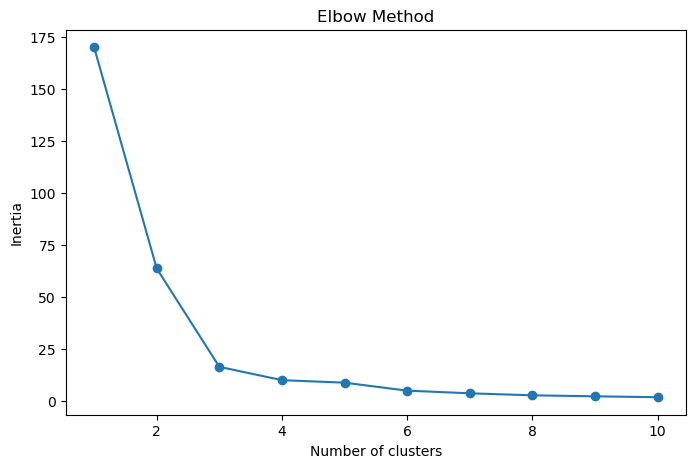

In [29]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [30]:
# Terapkan K-Means dengan jumlah klaster optimal (contoh: 3 klaster)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
# Simpan hasil klastering ke file CSV baru
output_file = "data_with_clusters.csv"
df.to_csv(output_file, index=False)
print(f"Hasil klastering disimpan di {output_file}")

Hasil klastering disimpan di data_with_clusters.csv


In [32]:
# Tampilkan hasil klastering
print("Hasil Klastering:")
print(df[["provinsi", "Cluster"]])

Hasil Klastering:
                      provinsi  Cluster
0                         Aceh        0
1                         Bali        0
2                       Banten        0
3                     Bengkulu        0
4   Daerah Istimewa Yogyakarta        0
5                  DKI Jakarta        2
6                    Gorontalo        0
7                        Jambi        0
8                   Jawa Barat        1
9                  Jawa Tengah        1
10                  Jawa Timur        1
11            Kalimantan Barat        0
12          Kalimantan Selatan        0
13           Kalimantan Tengah        0
14            Kalimantan Timur        0
15            Kalimantan Utara        0
16   Kepulauan Bangka Belitung        0
17              Kepulauan Riau        0
18                     Lampung        0
19                      Maluku        0
20                Maluku Utara        0
21         Nusa Tenggara Barat        0
22         Nusa Tenggara Timur        0
23                    

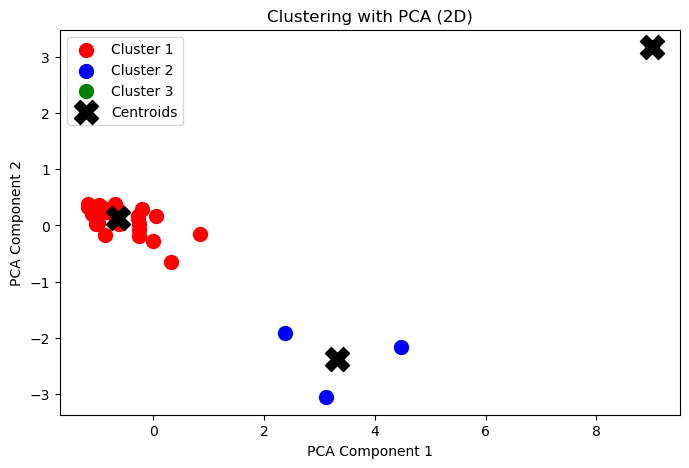

In [33]:
# Visualisasi Clustering dengan PCA
pca = PCA(n_components=2)  # Reduksi dimensi ke 2D
X_pca = pca.fit_transform(X_scaled)

# Plot hasil clustering
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[df['Cluster'] == 0, 0], X_pca[df['Cluster'] == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_pca[df['Cluster'] == 1, 0], X_pca[df['Cluster'] == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_pca[df['Cluster'] == 2, 0], X_pca[df['Cluster'] == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Centroid dari setiap cluster
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s = 300, c = 'black', marker = 'X', label = 'Centroids')

# Menambahkan detail plot
plt.title('Clustering with PCA (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()